<a href="https://colab.research.google.com/github/dianas11xx/ML-Data-Analytics-Projects/blob/main/Assignments/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 - Decision Tree Classifier


In [2]:
# import libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
# import data
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics & AI/HW2/hw2-1.q1.data/hw2.q1.train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics & AI/HW2/hw2-1.q1.data/hw2.q1.test.csv')
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics & AI/HW2/hw2-1.q1.data/hw2.q1.new.csv')
# print shape of datasets
print('train contains %d rows and %d columns' %train.shape)
print('test contains %d rows and %d columns' %test.shape)
print('new contains %d rows and %d columns' %new.shape)
print('First 3 rows in train:')
train.head(3) # display first 3 training samples


train contains 10000 rows and 26 columns
test contains 2000 rows and 26 columns
new contains 30 rows and 26 columns
First 3 rows in train:


,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25
0,1.0,0.523,0.303,0.898,0.505,0.264,0.441,0.794,0.868,0.744,...,0.136,0.187,0.452,0.459,0.656,0.126,0.245,0.973,0.917,0.740
1,0.0,0.546,0.782,0.323,0.495,0.970,0.127,0.167,0.359,0.065,...,0.616,0.734,0.935,0.782,0.218,0.223,0.931,0.205,0.487,0.065
2,0.0,0.441,0.260,0.824,0.715,0.071,0.004,0.819,0.063,0.343,...,0.209,0.174,0.542,0.970,0.171,0.459,0.316,0.949,0.871,0.720


## Specify inputs and outputs

In [4]:
features = list(train)[1:] # all but the first column header are feature names
print("features:", features)
X_train, X_test, X_new = train[features], test[features], new[features]
y_train, y_test = train.y, test.y
print('Shapes:')
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, X_new: {X_new.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

features: ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25']
Shapes:
X_train: (10000, 25), X_test: (2000, 25), X_new: (30, 25)
y_train: (10000,), y_test: (2000,)


## Task 1
Use 5-fold CV with the 10,000 labeled examples from train dataset to determine the fewest number of rules using which a decision tree classifier can achieve mean cross-val accuracy of at least 0.96.

In [5]:
for k in range(2,16):
  model = DecisionTreeClassifier(max_leaf_nodes=k)
  score = cross_val_score(model, X_train, y_train, cv=5).mean()
  print(f'Mean cross-validation accuracy with {k} rules = {score:0.4f}')

Mean cross-validation accuracy with 2 rules = 0.7178
Mean cross-validation accuracy with 3 rules = 0.8636
Mean cross-validation accuracy with 4 rules = 0.9695
Mean cross-validation accuracy with 5 rules = 0.9695
Mean cross-validation accuracy with 6 rules = 0.9694
Mean cross-validation accuracy with 7 rules = 0.9691
Mean cross-validation accuracy with 8 rules = 0.9690
Mean cross-validation accuracy with 9 rules = 0.9688
Mean cross-validation accuracy with 10 rules = 0.9689
Mean cross-validation accuracy with 11 rules = 0.9689
Mean cross-validation accuracy with 12 rules = 0.9688
Mean cross-validation accuracy with 13 rules = 0.9688
Mean cross-validation accuracy with 14 rules = 0.9688
Mean cross-validation accuracy with 15 rules = 0.9687


In [6]:
# Compare criterion hyperparameter
gini = DecisionTreeClassifier(max_leaf_nodes=4, criterion="gini")
score_gini = cross_val_score(model, X_train, y_train, cv=5).mean()
print(f'Mean cross-validation accuracy with {4} rules and gini criterion = {score_gini:0.4f}')

entropy = DecisionTreeClassifier(max_leaf_nodes=4, criterion="entropy")
score_entropy = cross_val_score(model, X_train, y_train, cv=5).mean()
print(f'Mean cross-validation accuracy with {4} rules and entrophy criterion = {score_entropy:0.4f}')

Mean cross-validation accuracy with 4 rules and gini criterion = 0.9685
Mean cross-validation accuracy with 4 rules and entrophy criterion = 0.9687


As we could see, the default criterion, giny, gives us a higher accuracy

# Task 2
Train a DecisionTreeClassifier with the hyper-parameter values determined in Task 1 on all 10,000 training samples and use it to predict the output class ‘y’ for the 2,000 examples in “hw2.q1.test.csv”.

In [7]:
k = 4 # selected value for max_leaf_nodes
chosen_model = DecisionTreeClassifier(max_leaf_nodes=k)
chosen_model.fit(X_train, y_train) # train selected model on ALL training examples
predicted = chosen_model.predict(X_test) # predicted y for test examples
acc = accuracy_score(y_test, predicted) # accuracy on test samples
print(f'Accuracy on test samples = {acc:0.4f}') # show test accuracy
print("Classification report on test samples:") # for precision, recall, F1-score
print(classification_report(y_test, predicted, digits=4)) # rounded to 4 decimal places
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
cm.to_csv('cm.csv') # save confusion matrix
cm # display confusion matrix

Accuracy on test samples = 0.9710
Classification report on test samples:
              precision    recall  f1-score   support

         0.0     0.9679    0.9771    0.9725      1048
         1.0     0.9745    0.9643    0.9694       952

    accuracy                         0.9710      2000
   macro avg     0.9712    0.9707    0.9709      2000
weighted avg     0.9710    0.9710    0.9710      2000



,0,1
0,1024,24
1,34,918


# Task 3
Use the model trained in Task 2 to predict the output class ‘y’ for the 30 examples in “hw2.q1.new.csv”. Specify the predicted classes.

In [8]:
predicted_new = chosen_model.predict(X_new) # predicted classes for unlabeled samples
new_prediction = pd.DataFrame() # dataframe with predicted classes
new_prediction['ID'] = new.ID # identifiers for unlabeled samples
new_prediction['y'] = predicted_new # # predicted classes for unlabeled samples
new_prediction.to_csv('hw2.q1.prediction.csv', index=False) # save as CSV file
new_prediction.y # display results

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


# Task 4

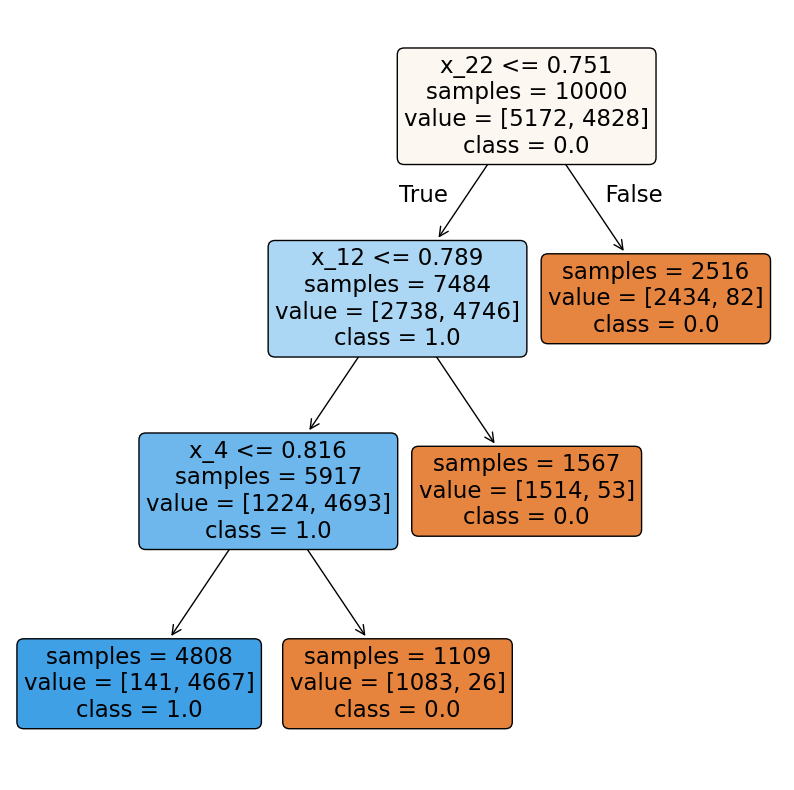

In [9]:
# Display Tree
plt.figure(figsize=(10, 10))

plot_tree(chosen_model,
          feature_names=features,
          class_names=[f'{c}' for c in chosen_model.classes_],
          filled=True, rounded=True, impurity=False) # plot tree

plt.savefig("hw2.q1.decision_tree.png") # save as PNG file
plt.show() # show tree

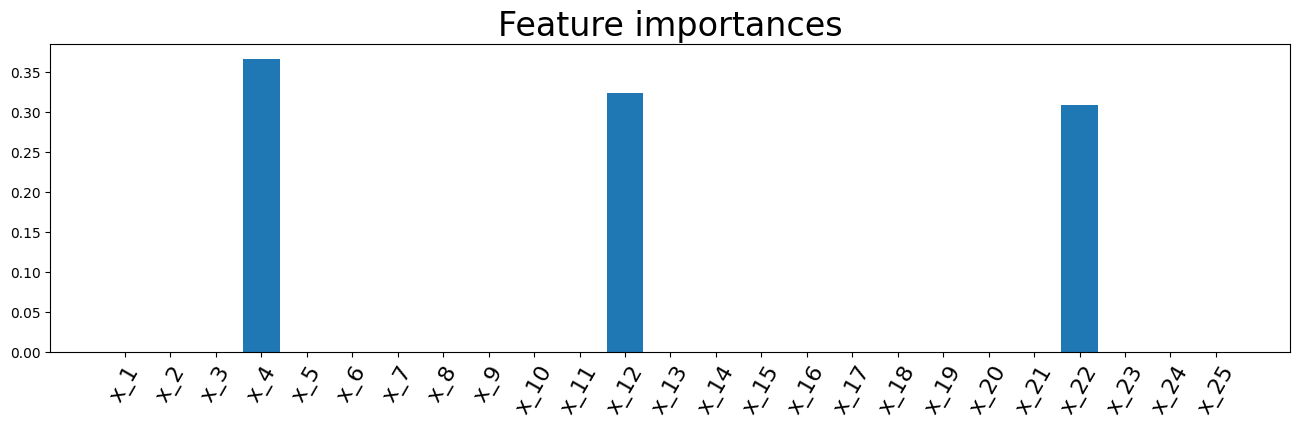

In [10]:
# Plot Feature Importance
plt.figure(figsize=(16, 4)) # size of figure to be displayed
plt.bar(features, chosen_model.feature_importances_)
plt.xticks(rotation = 60, fontsize=16)
plt.title('Feature importances', fontsize=24)
plt.show()

# Question 2. Supervised machine learning classifiers

•	“hw2.q2.train.csv” contains 8,000 rows and 11 columns. The first column ‘y’ is the output variable with 4 classes: 0, 1, 2, 3. The remaining 10 columns contain input features: x1, …, x10.
•	“hw2.q2.test.csv” contains 2,000 rows and 11 columns. The first column ‘y’ is the output variable with 4 classes: 0, 1, 2, 3. The remaining 10 columns contain input features: x1, …, x10.
•	“hw2.q1.new.csv” contains 30 rows and 10 columns. The first column ‘ID’ is an identifier for 30 unlabeled samples. The remaining 10 columns contain input features: x1, …, x10.


### Extract Data

In [11]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics & AI/HW2/hw2-1.q2.data/hw2.q2.train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics & AI/HW2/hw2-1.q2.data/hw2.q2.test.csv')
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics & AI/HW2/hw2-1.q2.data/hw2.q2.new.csv')

print('train contains %d rows and %d columns' %train.shape)
print('test contains %d rows and %d columns' %test.shape)
print('new contains %d rows and %d columns' %new.shape)
print('First 3 rows in train:')
train.head(3) # display first 3 training samples

train contains 8000 rows and 11 columns
test contains 2000 rows and 11 columns
new contains 30 rows and 11 columns
First 3 rows in train:


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,2.0,-0.613,-1.465,-1.105,0.436,-1.658,-1.357,-2.375,-0.997,-0.653,1.186
1,1.0,-1.154,0.473,3.159,-4.770,0.402,-0.160,-1.925,-0.105,-2.304,0.032
2,2.0,0.147,-0.814,-0.792,-1.403,2.124,-2.263,-2.133,-2.461,-0.781,0.932


In [12]:
features = list(train)[1:] # all but the first column header are feature names
print("features:", features)
X_train, X_test, X_new = train[features], test[features], new[features]
y_train, y_test = train.y, test.y
print('Shapes:')
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, X_new: {X_new.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

features: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
Shapes:
X_train: (8000, 10), X_test: (2000, 10), X_new: (30, 10)
y_train: (8000,), y_test: (2000,)


# Task 1
Use 4-fold cross-validation with the 8,000 labeled exampled from “hw2.q2.train.csv” to identify a classifier that achieves mean cross-validation accuracy of at least 0.96.  You should try several Scikit-Learn classifiers, including: GaussianNB, DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier, KNeighborsClassifier, LogisticRegression, SVC, and MLPClassifier. Try different hyper-parameter values for the better performing classifiers to obtain a good set of hyper-parameter values. Then select the best performing model.

In [13]:
# import classifier libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from time import time

Create dictionary of Scikit-Learn classifiers with non-default parameters

In [14]:
CLASSIFIERS = {}
CLASSIFIERS['GNB'] = GaussianNB()
CLASSIFIERS['DT'] = DecisionTreeClassifier()
CLASSIFIERS['RF'] = RandomForestClassifier()
CLASSIFIERS['ET'] = ExtraTreesClassifier()
CLASSIFIERS['KNN'] = KNeighborsClassifier(algorithm='brute')
CLASSIFIERS['LRM'] = LogisticRegression(max_iter=10000)
CLASSIFIERS['SVM'] = SVC()
CLASSIFIERS['MLP'] = MLPClassifier(max_iter=10000)

print('Available sklearn classifiers:')
for c in CLASSIFIERS:
    print(f'{c} : {CLASSIFIERS[c].__class__.__name__}')

Available sklearn classifiers:
GNB : GaussianNB
DT : DecisionTreeClassifier
RF : RandomForestClassifier
ET : ExtraTreesClassifier
KNN : KNeighborsClassifier
LRM : LogisticRegression
SVM : SVC
MLP : MLPClassifier


Evalute the each model performance using the data and apply a 4-fold cross validation

In [15]:
result = [] # list containing evaluation results

for c in CLASSIFIERS:
    model = CLASSIFIERS[c] # create model (classifier object)
    st = time() # start time for training and validation
    score = cross_val_score(model, X_train, y_train, cv=4).mean() # mean cross-validation accuracy
    t = time() - st # time taken for k-fold cross-validation
    result.append([c, score, t]) # record results
    # print results for classifier
    print(f'Model: {c}, CV accuracy = {score:0.3f}, Time={t:0.3f} seconds')


Model: GNB, CV accuracy = 0.849, Time=0.074 seconds
Model: DT, CV accuracy = 0.842, Time=0.868 seconds
Model: RF, CV accuracy = 0.940, Time=13.851 seconds
Model: ET, CV accuracy = 0.950, Time=4.080 seconds
Model: KNN, CV accuracy = 0.964, Time=2.583 seconds
Model: LRM, CV accuracy = 0.881, Time=0.704 seconds
Model: SVM, CV accuracy = 0.967, Time=5.140 seconds
Model: MLP, CV accuracy = 0.959, Time=72.253 seconds


Compare the performance of the classifiers

In [16]:
# Evaluation results maintained as pandas dataframe
cols = ['classifier', 'cv_score', 'time'] # column headers
result_df = pd.DataFrame(result, columns=cols).round(3) # create pandas dataframe (round values to 3 decimal places)
result_df.to_csv('model_evaluation.csv', index=False) # save results in CSV file
result_df # show results

,classifier,cv_score,time
0,GNB,0.849,0.074
1,DT,0.842,0.868
2,RF,0.940,13.851
3,ET,0.950,4.080
4,KNN,0.964,2.583
5,LRM,0.881,0.704
6,SVM,0.967,5.140
7,MLP,0.959,72.253


Show the best 3 models

In [17]:
show_cols = ['classifier', 'cv_score', 'time'] # columns to display
df = result_df.sort_values(by=['cv_score', 'time'], ascending=[False, True])[show_cols]
print(df.iloc[:3]) # show best 3 models

  classifier  cv_score    time
6        SVM     0.967   5.140
4        KNN     0.964   2.583
7        MLP     0.959  72.253


## Let's try a couple of different hyperparameters for the best 3 models

### SVC
Let's hypertune the penalty C

In [18]:
for penalty in list(range(2, 21, 2)): # values to try
    model = SVC(C=penalty)
    score = cross_val_score(model, X_train, y_train).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy = {score:0.4f} for SVC with C = {penalty:0.1f}')


Mean cross-validation accuracy = 0.9692 for SVC with C = 2.0
Mean cross-validation accuracy = 0.9710 for SVC with C = 4.0
Mean cross-validation accuracy = 0.9708 for SVC with C = 6.0
Mean cross-validation accuracy = 0.9704 for SVC with C = 8.0
Mean cross-validation accuracy = 0.9702 for SVC with C = 10.0
Mean cross-validation accuracy = 0.9700 for SVC with C = 12.0
Mean cross-validation accuracy = 0.9694 for SVC with C = 14.0
Mean cross-validation accuracy = 0.9686 for SVC with C = 16.0
Mean cross-validation accuracy = 0.9685 for SVC with C = 18.0
Mean cross-validation accuracy = 0.9680 for SVC with C = 20.0


As we could see, when C=4, the mean cross-validation accuracy is highest (0.9710)

### KNN
Let's search for a good value for the number of nearest neighbors

In [19]:
for k in range(1,15): # values to try
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy = {score:0.4f} for KNeighborsClassifier with {k} neighbors')

Mean cross-validation accuracy = 0.9461 for KNeighborsClassifier with 1 neighbors
Mean cross-validation accuracy = 0.9419 for KNeighborsClassifier with 2 neighbors
Mean cross-validation accuracy = 0.9575 for KNeighborsClassifier with 3 neighbors
Mean cross-validation accuracy = 0.9601 for KNeighborsClassifier with 4 neighbors
Mean cross-validation accuracy = 0.9637 for KNeighborsClassifier with 5 neighbors
Mean cross-validation accuracy = 0.9639 for KNeighborsClassifier with 6 neighbors
Mean cross-validation accuracy = 0.9649 for KNeighborsClassifier with 7 neighbors
Mean cross-validation accuracy = 0.9636 for KNeighborsClassifier with 8 neighbors
Mean cross-validation accuracy = 0.9629 for KNeighborsClassifier with 9 neighbors
Mean cross-validation accuracy = 0.9623 for KNeighborsClassifier with 10 neighbors
Mean cross-validation accuracy = 0.9630 for KNeighborsClassifier with 11 neighbors
Mean cross-validation accuracy = 0.9630 for KNeighborsClassifier with 12 neighbors
Mean cross-va

When n_neighbors = 7, the accuracy is highest (0.9649)

## MLP
Let's try to modify the hyperparameters of MLP

In [20]:
model = MLPClassifier(hidden_layer_sizes=(1000, 100), max_iter=1000, verbose=True)
score = cross_val_score(model, X_train, y_train,cv=4).mean() # mean cross-validation accuracy
print(f'Mean cross-validation accuracy = {score:0.4f}')

Iteration 1, loss = 0.43525281
Iteration 2, loss = 0.23172691
Iteration 3, loss = 0.20229868
Iteration 4, loss = 0.18772002
Iteration 5, loss = 0.17292043
Iteration 6, loss = 0.16441157
Iteration 7, loss = 0.15759460
Iteration 8, loss = 0.15163737
Iteration 9, loss = 0.14787766
Iteration 10, loss = 0.13862945
Iteration 11, loss = 0.13474962
Iteration 12, loss = 0.13117314
Iteration 13, loss = 0.12435670
Iteration 14, loss = 0.12072650
Iteration 15, loss = 0.12118569
Iteration 16, loss = 0.11230072
Iteration 17, loss = 0.10998509
Iteration 18, loss = 0.10259420
Iteration 19, loss = 0.10199313
Iteration 20, loss = 0.09973675
Iteration 21, loss = 0.09177479
Iteration 22, loss = 0.09026761
Iteration 23, loss = 0.08616582
Iteration 24, loss = 0.08320311
Iteration 25, loss = 0.08234886
Iteration 26, loss = 0.07616660
Iteration 27, loss = 0.07549116
Iteration 28, loss = 0.07038383
Iteration 29, loss = 0.07394800
Iteration 30, loss = 0.06324073
Iteration 31, loss = 0.06344339
Iteration 32, los

After running SVC, KNN, and MLP, SVC performed the best with C=4, giving an accuracy of 0.9710

In [21]:
chosen_model = SVC(C=4)
print('Selected model: ', chosen_model)
print('Parameters')
for param, val in chosen_model.get_params().items():
    print(f'\t{param}: {val}')

Selected model:  SVC(C=4)
Parameters
	C: 4
	break_ties: False
	cache_size: 200
	class_weight: None
	coef0: 0.0
	decision_function_shape: ovr
	degree: 3
	gamma: scale
	kernel: rbf
	max_iter: -1
	probability: False
	random_state: None
	shrinking: True
	tol: 0.001
	verbose: False


# Task 2
Train the classifier with the hyper-parameter values determined in Task 1 on all 8,000 training samples and use it to predict the output class ‘y’ for the 2,000 examples in “hw2.q2.test.csv”.

In [22]:
chosen_model = SVC(C=4)
chosen_model.fit(X_train, y_train) # train selected model on ALL training examples
predicted = chosen_model.predict(X_test) # predicted classes for test examples
acc = accuracy_score(y_test, predicted) # accuracy on test samples
print(f'Accuracy on test samples = {acc:0.4f}') # show test accuracy
print("Classification report on test samples:") # for precision, recall, F1-score
print(classification_report(y_test, predicted, digits=4)) # rounded to 4 decimal places

Accuracy on test samples = 0.9755
Classification report on test samples:
              precision    recall  f1-score   support

         0.0     0.9645    0.9780    0.9712       500
         1.0     0.9638    0.9618    0.9628       498
         2.0     0.9858    0.9858    0.9858       493
         3.0     0.9881    0.9764    0.9822       509

    accuracy                         0.9755      2000
   macro avg     0.9755    0.9755    0.9755      2000
weighted avg     0.9756    0.9755    0.9755      2000



In [23]:
# Display confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
cm.to_csv('cm.csv') # save confusion matrix
cm # display confusion matrix

,0,1,2,3
0,489,7,1,3
1,11,479,6,2
2,3,3,486,1
3,4,8,0,497


# Task 3
Use the model trained in Task 2 to predict the output class ‘y’ for the 30 examples in “hw2.q2.new.csv”.

In [24]:
predicted_new = chosen_model.predict(X_new) # predicted classes for unlabeled samples
hw2q2_prediction = pd.DataFrame() # dataframe with predicted classes
hw2q2_prediction['ID'] = new.ID # identifiers for unlabeled samples
hw2q2_prediction['y'] = predicted_new # # predicted classes for unlabeled samples
hw2q2_prediction.to_csv('hw2.q2.prediction.csv', index=False) # save as CSV file
hw2q2_prediction # display results

,ID,y
0,ID_001,0.0
1,ID_002,0.0
2,ID_003,0.0
3,ID_004,0.0
4,ID_005,0.0
5,ID_006,0.0
6,ID_007,0.0
7,ID_008,0.0
8,ID_009,0.0
9,ID_010,0.0


In [25]:
hw2q2_prediction.y

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
